In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [16]:
train = pd.read_csv('train.csv', index_col = 'PassengerId')
train = train.drop('Ticket', axis=1)
# train

In [17]:
train.notnull().astype(int).drop_duplicates()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,0,1,1,1,0,1
32,1,1,1,1,0,1,1,1,1,1
62,1,1,1,1,1,1,1,1,1,0


In [18]:
train['Male'] = train['Sex'] == 'male' ; train['Male'] = train['Male'].astype(int)
train = train.drop(['Sex'], axis=1)
# train

In [19]:
train['CabinLetter'] = train[ train['Cabin'].notnull() ]['Cabin'].apply(lambda x: x[0])
train['CabinLetter'] = train[ train['CabinLetter'].notnull() ]['CabinLetter'].apply(lambda x: {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H' : 8, 'T': 9}[x])

In [20]:
train['CabinNumber'] = train[ train['Cabin'].notnull() ]['Cabin'].apply(lambda x: x.split(' ')[0][1:])
train.loc[ train['CabinNumber'] == '', 'CabinNumber'] = np.nan
train['CabinNumber'] = train[ train['CabinNumber'].notnull() ]['CabinNumber'].astype(int)

In [21]:
train = train.drop('Cabin', axis=1)

In [22]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)
train = train.drop('Embarked', axis=1)
# train

In [23]:
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
train['Alone'] = train['FamilySize'] == 1

In [24]:
train['Fare_Low'] = ((train['Fare'] >= 5) & (train['Fare'] < 10)).astype(int)

In [25]:
train['Title'] = train['Name'].apply(lambda x: x.split(' ')[1][:-1])
train['Title_Professional'] = train['Title'].map({'Dr': 1, 'Capt':1, 'Major':1, 'Col':1}).fillna(0)
train['Title_Mr'] = train['Title'].map({'Mr': 1}).fillna(0)
train['Title_Mrs'] = train['Title'].map({'Mrs': 1, 'Mme':1}).fillna(0)
train['Title_Miss'] = train['Title'].map({'Miss': 1, 'Mlle':1}).fillna(0)
train['Title_Master'] = train['Title'].map({'Master': 1}).fillna(0)
train['Title_Other'] = 1 - (train['Title_Mr'] +train['Title_Mrs'] + train['Title_Miss'] + train['Title_Master'] + train['Title_Professional'])
# ) or (train['Title'] == 'Col') or (train['Title'] == 'Dr') or (train['Title'] == 'Major') or (train['Title'] == 'Rev')
# train.groupby('Title').count()
# train['Title'].unique()
# train[['Title', 'Title_Professional', 'Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_Other']].drop_duplicates()
train = train.drop(['Name', 'Title'], axis=1)

In [26]:
train['Child'] = (train['Age'] < 16).astype(int)
train['Parent'] = (train['Parch'] > 0) & (train['Age'] > 16)

In [27]:
train[ train['Survived'] == 0 ].groupby('Pclass')['Survived'].count()

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

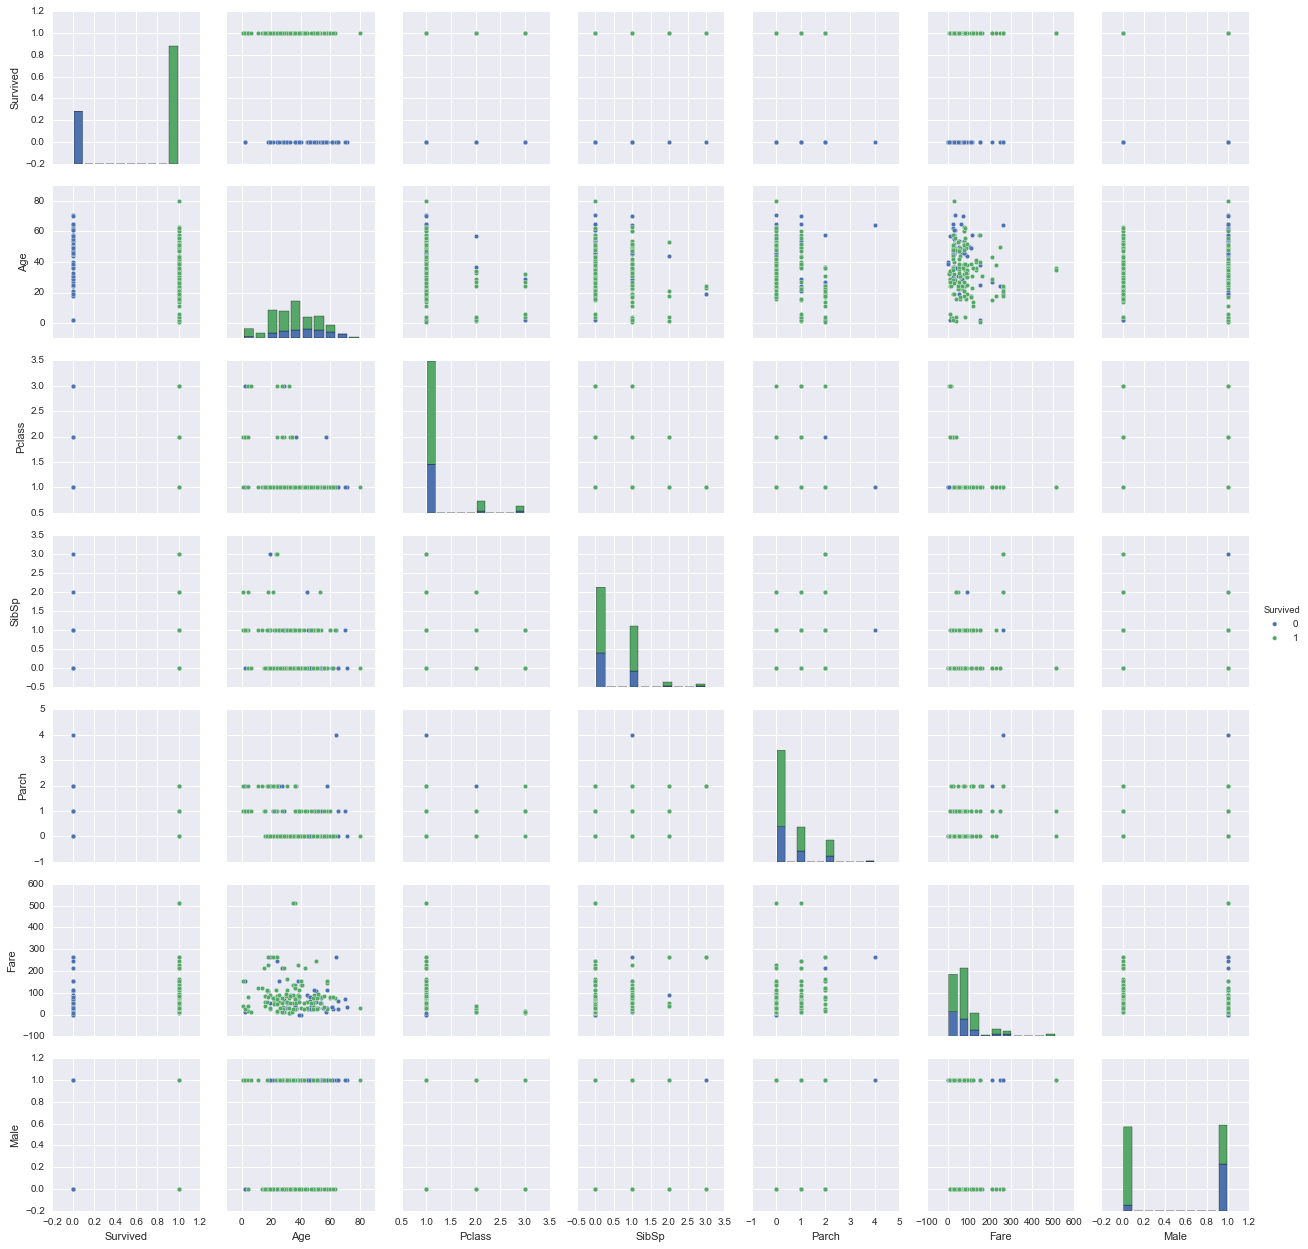

In [39]:
sns.set()
# data = sns.load_dataset('iris')
sns.pairplot(train.dropna()[['Survived', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Male']], hue='Survived')

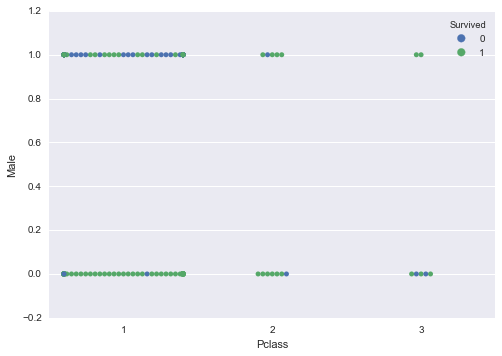

In [35]:
sns.swarmplot(x="Pclass", y="Male", hue="Survived", data=train.dropna());

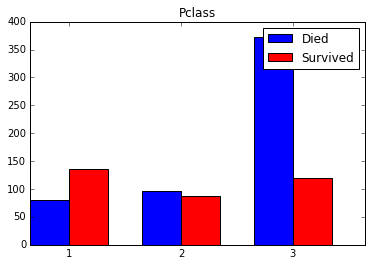

In [424]:
feature = 'Pclass'

plt.figure()
plt.title(feature)

values = train[feature].dropna().unique()
values.sort()
index = np.arange(np.size(values))

plt.bar(index, train[ train['Survived'] == 0 ].groupby(feature)['Survived'].count(), 0.35,
               color='b',
               label='Died')

plt.bar(index+0.35, train[ train['Survived'] == 1 ].groupby(feature)['Survived'].count(), 0.35,
               color='r',
               label='Survived')
plt.xticks(index + 0.35, values)

plt.legend()
plt.show()

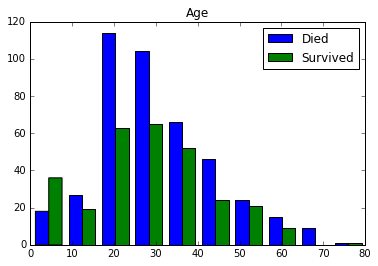

In [397]:
feature = 'Age'
plt.figure()
plt.title(feature)
plt.hist([train[ train['Survived'] == 0 ][feature].dropna(), train[ train['Survived'] == 1 ][feature].dropna()])
plt.legend(["Died", "Survived"])
plt.show()

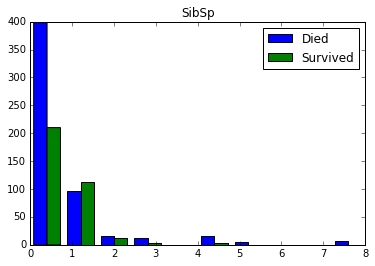

In [395]:
feature = 'SibSp'
plt.figure()
plt.title(feature)
plt.hist([train[ train['Survived'] == 0 ][feature].dropna(), train[ train['Survived'] == 1 ][feature].dropna()])
plt.legend(["Died", "Survived"])
plt.show()

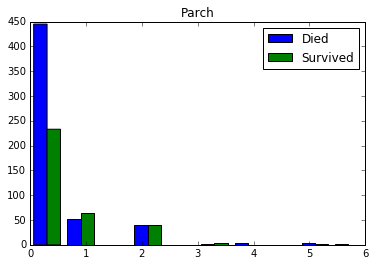

In [396]:
feature = 'Parch'
plt.figure()
plt.title(feature)
plt.hist([train[ train['Survived'] == 0 ][feature].dropna(), train[ train['Survived'] == 1 ][feature].dropna()])
plt.legend(["Died", "Survived"])
plt.show()

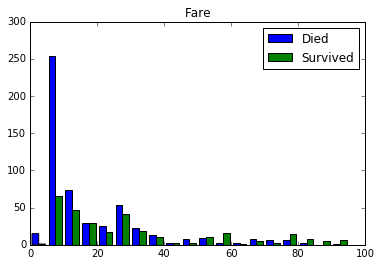

In [412]:
feature = 'Fare'
plt.figure()
plt.title(feature)
plt.hist([train[ train['Survived'] == 0 ][feature].dropna(), train[ train['Survived'] == 1 ][feature].dropna()], 20, range=(0,100))
plt.legend(["Died", "Survived"])
plt.show()

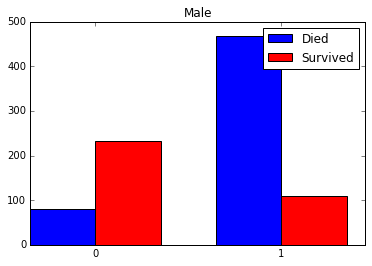

In [425]:
feature = 'Male'

plt.figure()
plt.title(feature)

values = train[feature].dropna().unique()
values.sort()
index = np.arange(np.size(values))

plt.bar(index, train[ train['Survived'] == 0 ].groupby(feature)['Survived'].count(), 0.35,
               color='b',
               label='Died')

plt.bar(index+0.35, train[ train['Survived'] == 1 ].groupby(feature)['Survived'].count(), 0.35,
               color='r',
               label='Survived')
plt.xticks(index + 0.35, values)

plt.legend()
plt.show()

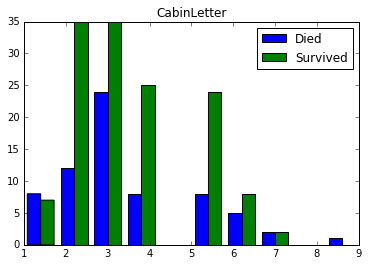

In [429]:
feature = 'CabinLetter'
plt.figure()
plt.title(feature)
plt.hist([train[ train['Survived'] == 0 ][feature].dropna(), train[ train['Survived'] == 1 ][feature].dropna()])
plt.legend(["Died", "Survived"])
plt.show()

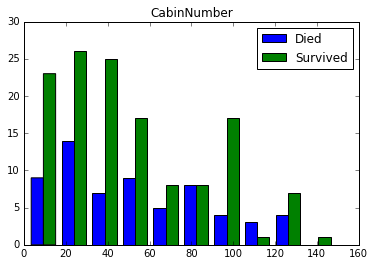

In [430]:
feature = 'CabinNumber'
plt.figure()
plt.title(feature)
plt.hist([train[ train['Survived'] == 0 ][feature].dropna(), train[ train['Survived'] == 1 ][feature].dropna()])
plt.legend(["Died", "Survived"])
plt.show()

 1) Pclass                         0.178627
 2) Age                            0.144275
 3) SibSp                          0.141258
 4) Parch                          0.110762
 5) Fare                           0.109577
 6) Male                           0.068881
 7) CabinLetter                    0.033028
 8) CabinNumber                    0.029516
 9) Embarked_S                     0.024180
10) Embarked_C                     0.023456
11) Embarked_Q                     0.020382
12) FamilySize                     0.019115
13) Title_Professional             0.017841
14) Title_Mr                       0.014759
15) Title_Mrs                      0.013694
16) Title_Miss                     0.010709
17) Title_Master                   0.010522
18) Title_Other                    0.009244
19) Alone                          0.008394
20) Child                          0.006084
21) Parent                         0.003380
22) Fare_Low                       0.002315


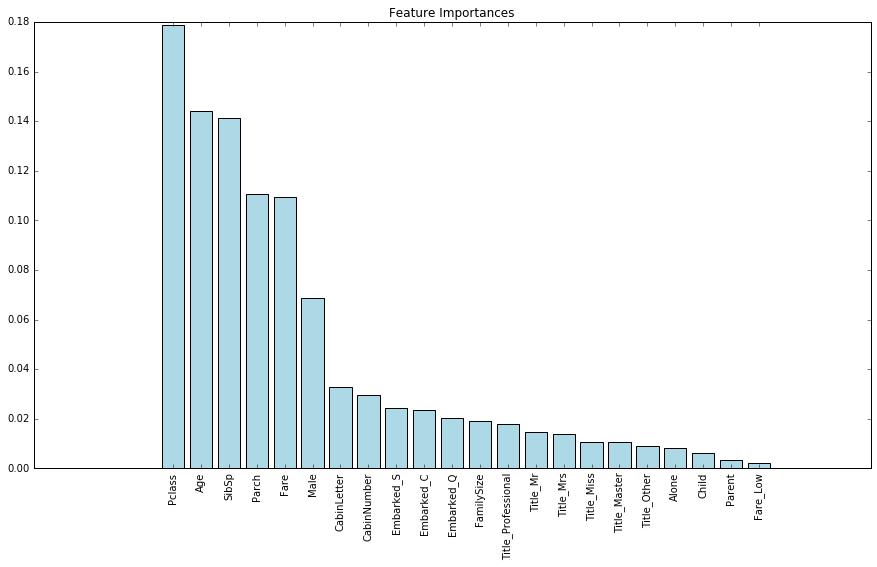

In [411]:
train_notnull = train.dropna()
X = train_notnull.drop('Survived', axis=1).values
y = train_notnull['Survived'].values

clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, train.columns[f+1], importances[indices[f]]))

plt.figure(figsize=(15,8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),
       importances[indices],
       color='lightblue',
       align='center')
plt.xticks(range(X.shape[1]), train.columns[1::], rotation=90)
plt.show()

In [ ]:
train_filled = train.fillna({
                      'Age': train['Age'].median(), 
                      'Embarked_S': train['Embarked_S'].mode()[0], 
                      'Embarked_C': train['Embarked_C'].mode()[0], 
                      'Embarked_Q': train['Embarked_Q'].mode()[0], 
                      'CabinLetter': train['CabinLetter'].mode()[0], 
                      'CabinNumber': train['CabinNumber'].mean() })

In [435]:
X = train_filled.drop('Survived', axis=1).values
y = train_filled['Survived'].values

n_estimators = 100
clf = AdaBoostClassifier(n_estimators=n_estimators)

scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.8092691043685214

In [ ]:
train_filled = train.fillna({
                      'Embarked_S': train['Embarked_S'].mode()[0], 
                      'Embarked_C': train['Embarked_C'].mode()[0], 
                      'Embarked_Q': train['Embarked_Q'].mode()[0], 
                      'CabinLetter': train['CabinLetter'].mode()[0], 
                      'CabinNumber': train['CabinNumber'].mean() })

X = train.drop(['Survived','Embarked_S','Embarked_C','Embarked_Q','CabinLetter','CabinNumber'], axis=1).values
y = train['Age'].values

n_estimators = 15
clf = RandomForestClassifier(n_estimators=n_estimators)

scores = cross_val_score(clf, X, y, cv=100)
scores.mean()

In [436]:
train.drop['Survived']

TypeError: 'instancemethod' object has no attribute '__getitem__'

In [ ]:
X = train_filled.drop('Survived', axis=1).values
y = train_filled['Survived'].values

clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, train.columns[f+1], importances[indices[f]]))

plt.figure(figsize=(15,8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),
       importances[indices],
       color='lightblue',
       align='center')
plt.xticks(range(X.shape[1]), train.columns[1::], rotation=90)
plt.show()


In [ ]:
# train['Embarked'] = train['Embarked'].apply(lambda x: {'S': 1, 'C': 2, 'Q': 3}[x]) ; train

In [365]:
# train[ train.isnull().any(axis=1) ]

In [ ]:
X = train_filled.drop('Survived', axis=1).values
y = train_filled['Survived'].values

In [ ]:
%matplotlib inline
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)


In [ ]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i in zip(colors, [0, 1]):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw)
plt.show()

In [ ]:
pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_r[y == 0,0], X_r[y == 0,1], X_r[y == 0,2], color='navy')
ax.scatter(X_r[y == 1,0], X_r[y == 1,1], X_r[y == 1,2], color='turquoise')
plt.show()


In [ ]:
clf = svm.SVC()
clf.fit(X, y)  

(clf.predict(X) == y).sum() / float(np.size(y)) # recall

In [ ]:
clf = svm.LinearSVC()

scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

In [ ]:
for n_components in np.arange(2,np.shape(X)[1]):
    pca = PCA(n_components=n_components)
    X_r = pca.fit(X).transform(X)

    clf = svm.LinearSVC()

    scores = cross_val_score(clf, X_r, y, cv=5)
    print n_components, scores.mean()

In [ ]:
clf = svm.LinearSVC()

scores = cross_val_score(clf, X, y, cv=100)
scores.mean()

In [ ]:
n_neighbors = 15
weights = 'distance'
clf = KNeighborsClassifier(n_neighbors, weights=weights)

scores = cross_val_score(clf, X, y, cv=100)
scores.mean()

In [ ]:
n_estimators = 15
clf = RandomForestClassifier(n_estimators=n_estimators)

scores = cross_val_score(clf, X, y, cv=100)
scores.mean()

In [ ]:
n_estimators = 100
clf = AdaBoostClassifier(n_estimators=n_estimators)

scores = cross_val_score(clf, X, y, cv=100)
scores.mean()

In [ ]:
# print 'Ohai!'
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5,
#                        scoring='precision')
# print 'Hi'
# clf.fit(X, y)
# print 'I am alive'
# clf.best_params_